<a href="https://colab.research.google.com/github/vaibhavi128/Machine-Learning-Assignment-/blob/main/Naiive_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset: SMS Spam Collection Dataset**


**Description: Contains SMS messages labeled as spam or ham (not spam).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1', 'v2']]  # Selecting only required columns
df.columns = ['label', 'message']  # Renaming columns


In [3]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_message'] = df['message'].apply(clean_text)


In [4]:
df.head(5)

,label,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [5]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


from matplotlib import pyplot as plt
_df_0['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

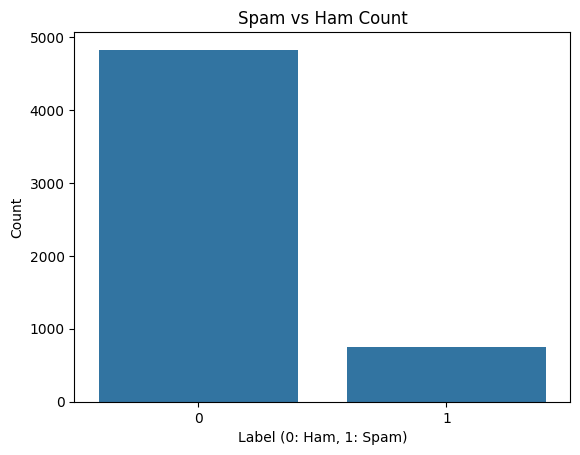

In [6]:
sns.countplot(x=df['label'])
plt.title("Spam vs Ham Count")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()


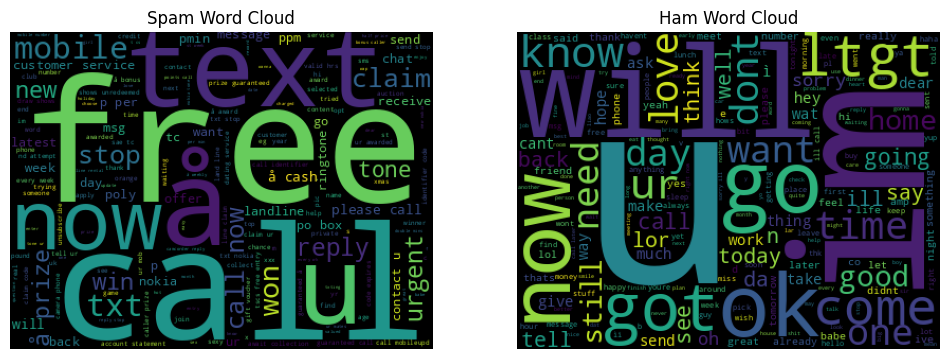

In [7]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 1]['clean_message'])
ham_words = ' '.join(df[df['label'] == 0]['clean_message'])

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.title("Spam Word Cloud")
plt.imshow(WordCloud(width=400, height=300).generate(spam_words))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Ham Word Cloud")
plt.imshow(WordCloud(width=400, height=300).generate(ham_words))
plt.axis("off")

plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label          5572 non-null   int64 
 1   message        5572 non-null   object
 2   clean_message  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [11]:
missing_count=df.isnull().sum()
missing_count

,0
label,0
message,0
clean_message,0


In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2, random_state=42)


In [14]:
X_train

,clean_message
1978,no im in the same boat still here at my moms c...
3989,bank of granite issues strongbuy explosive pic...
3935,they r giving a second chance to rahul dengra
4078,o i played smash bros ltgt religiously
4086,private your account statement for shows unred...
...,...
3772,i came hostel i m going to sleep plz call me u...
5191,sorry ill call later
5226,prabhaim sorydarealyfrm heart im sory
5390,nt joking seriously i told


In [15]:
y_train

,label
1978,0
3989,1
3935,0
4078,0
4086,1
...,...
3772,0
5191,0
5226,0
5390,0


In [16]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
print(X_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13264 stored elements and shape (1115, 7568)>
  Coords	Values
  (0, 1109)	0.28720621336810587
  (0, 2095)	0.3231865302804678
  (0, 2419)	0.31664055563359905
  (0, 2717)	0.31664055563359905
  (0, 2992)	0.34040451673917305
  (0, 3317)	0.15879683249429663
  (0, 4215)	0.352620872545961
  (0, 4310)	0.163140081281804
  (0, 4312)	0.3231865302804678
  (0, 6755)	0.36983885900466634
  (0, 7225)	0.28153583220818673
  (1, 196)	0.17204594708903725
  (1, 227)	0.09510817825363913
  (1, 311)	0.11285015385702439
  (1, 1289)	0.17508530915584178
  (1, 1326)	0.1924562040297582
  (1, 1702)	0.24167697521668463
  (1, 2066)	0.2556286870858016
  (1, 2175)	0.18383687105900764
  (1, 2296)	0.10172163498571363
  (1, 2676)	0.15930985898761954
  (1, 2799)	0.16009728578915905
  (1, 3025)	0.12095508432023586
  (1, 3167)	0.09611056704796543
  (1, 3280)	0.26480262821260225
  :	:
  (1111, 6521)	0.21796442447415348
  (1111, 6874)	0.2165836292366281
  (1111, 711

**Train Naïve Bayes Model**

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [22]:
y_pred = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.64      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



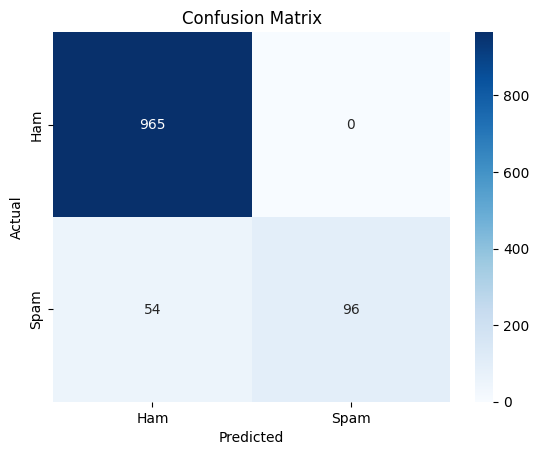

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


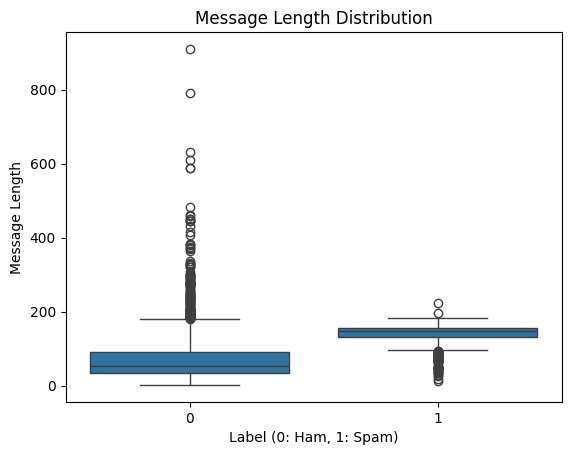

In [24]:
df['message_length'] = df['message'].apply(len)
sns.boxplot(x=df['label'], y=df['message_length'])
plt.title("Message Length Distribution")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Message Length")
plt.show()


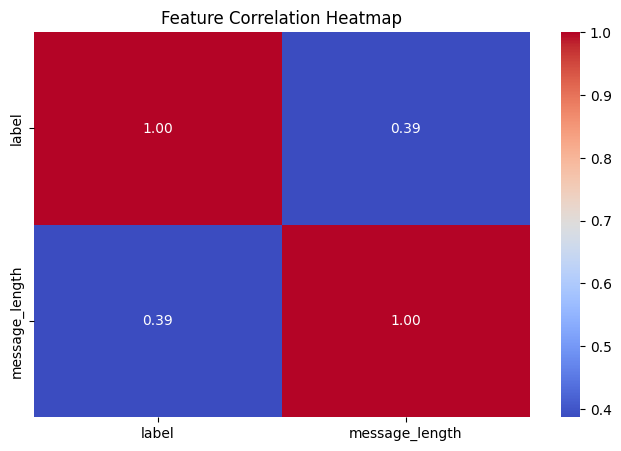

In [26]:
plt.figure(figsize=(8, 5))
# Calculate correlation only on numeric columns (label and message_length)
num_df = df[['label', 'message_length']]
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
dummy_messages = ["Congratulations! You have won a lottery worth $5000. Click here to claim.",
                  "Hey, how are you? Are we meeting today?",
                  "URGENT! Your account will be closed soon. Reply with your details to verify.",
                  "Let's catch up for dinner tomorrow."]

dummy_messages_clean = [clean_text(msg) for msg in dummy_messages]
dummy_messages_tfidf = vectorizer.transform(dummy_messages_clean)

predictions = nb_model.predict(dummy_messages_tfidf)

for msg, pred in zip(dummy_messages, predictions):
    print(f"Message: {msg} \nPrediction: {'Spam' if pred == 1 else 'Ham'}\n")


Message: Congratulations! You have won a lottery worth $5000. Click here to claim. 
Prediction: Spam

Message: Hey, how are you? Are we meeting today? 
Prediction: Ham

Message: URGENT! Your account will be closed soon. Reply with your details to verify. 
Prediction: Ham

Message: Let's catch up for dinner tomorrow. 
Prediction: Ham

